# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [319]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==2.0.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user


In [320]:
# Import
#Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Command to tell Python to actually display the graphs
%matplotlib inline

#
from ydata_profiling import ProfileReport

import warnings

# Suppress all warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)





**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

### Understanding the structure of the data

In [321]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [322]:
# Write your code here to read the data
Read_data=pd.read_csv("/content/sample_data/foodhub_order.csv")
#Using Approach 2 from Mentor Session

In [323]:
# Write your code here to view the first 5 rows
Read_data.head(5)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [324]:
# Write your code here
Read_data.shape
# checking the shape of the data
print("There are ",Read_data.shape[0],"rows and",Read_data.shape[1],"columns")

There are  1898 rows and 9 columns


#### Observations:The Dataset has 1898 number of rows with 9 columns


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [325]:
# Write your code here
Read_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
There is only 1 Float Dataype column
  4 object datatype column
  4 numerical datatypes
All the columns have 1898 observations.

*There are 3 Categorical variables -
     

1.   Cuisine Name
2.   rating
3. Day of week

* 1 Object Text data : Restaurant  Name

* 4 Numeric Data -
1.   Order id
2.   Customer id
3.   Food Preparation Time
4.   Delivery Time  







### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [326]:
# Write your code here

Null_perc = round(100*(Read_data.isnull().sum()/len(Read_data.index)),2)
print(Null_perc)
print("Checking data column: order_id",Read_data['order_id'].unique())

print("Checking data column: customer_id",Read_data['customer_id'].unique())

print("Checking data column: restaurant_name",Read_data['restaurant_name'].unique())

print("Checking data column: cuisine_type ",Read_data['cuisine_type'].unique())

print("Checking data column: cost_of_the_order",Read_data['cost_of_the_order'].unique())

print("Checking data column: day_of_the_week ",Read_data['day_of_the_week'].unique())

print("Checking data column: rating",Read_data['rating'].unique())

print("Checking data column: food_preparation_time",Read_data['food_preparation_time'].unique())

print("Checking data column: delivery_time",Read_data['delivery_time'].unique())




order_id                 0.0
customer_id              0.0
restaurant_name          0.0
cuisine_type             0.0
cost_of_the_order        0.0
day_of_the_week          0.0
rating                   0.0
food_preparation_time    0.0
delivery_time            0.0
dtype: float64
Checking data column: order_id [1477147 1477685 1477070 ... 1477819 1477513 1478056]
Checking data column: customer_id [337525 358141  66393 ...  97838 292602 397537]
Checking data column: restaurant_name ['Hangawi' 'Blue Ribbon Sushi Izakaya' 'Cafe Habana'
 'Blue Ribbon Fried Chicken' 'Dirty Bird to Go' 'Tamarind TriBeCa'
 'The Meatball Shop' 'Barbounia' 'Anjappar Chettinad' 'Bukhara Grill'
 'Big Wong Restaurant \x8c_¤¾Ñ¼' 'Empanada Mama (closed)' 'Pylos'
 "Lucky's Famous Burgers" 'Shake Shack' 'Sushi of Gari' 'RedFarm Hudson'
 'Blue Ribbon Sushi' 'Five Guys Burgers and Fries' 'Tortaria'
 'Cafe Mogador' 'Otto Enoteca Pizzeria' 'Vezzo Thin Crust Pizza'
 'Sushi of Gari 46' 'The Kati Roll Company' 'Klong' '5 Napkin B

#### Observations: Although isnull function shows that all records are Not null. Rating is a Data attribute which is  actually missing data as customers chose not give give a response and therefore has missing values.

Imputation by Mode - which means Replacing missing values with the most frequently occurring value
in the column - primarily used for categorical variables

But this needs to be consulted with Business to understand if they approve this approach.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [327]:
# Write your code here
stats =Read_data.describe().T
print(stats)
print("###############Extracting required statistical summary############" )
min_value = np.min(Read_data['food_preparation_time'])
print(f"Min: {min_value:.2f}")
mean_value = np.mean(Read_data['food_preparation_time'])
print(f"Mean: {mean_value:.2f}")
max_value = np.max(Read_data['food_preparation_time'])
print(f"Max: {max_value:.2f}")


                        count          mean            std         min  \
order_id               1898.0  1.477496e+06     548.049724  1476547.00   
customer_id            1898.0  1.711685e+05  113698.139743     1311.00   
cost_of_the_order      1898.0  1.649885e+01       7.483812        4.47   
food_preparation_time  1898.0  2.737197e+01       4.632481       20.00   
delivery_time          1898.0  2.416175e+01       4.972637       15.00   

                              25%         50%           75%         max  
order_id               1477021.25  1477495.50  1.477970e+06  1478444.00  
customer_id              77787.75   128600.00  2.705250e+05   405334.00  
cost_of_the_order           12.08       14.14  2.229750e+01       35.41  
food_preparation_time       23.00       27.00  3.100000e+01       35.00  
delivery_time               20.00       25.00  2.800000e+01       33.00  
###############Extracting required statistical summary############
Min: 20.00
Mean: 27.37
Max: 35.00


#### Observations:


The minimum, average, and maximum time it takes for food to be prepared once an order is placed are the following
#Minimum : 20 minutes
#Average : 27.37 minutes
#Maximum: 35 minutes



### **Question 5:** How many orders are not rated? [1 mark]

In [328]:
# Write the code here
print("Checking data column: rating",Read_data['rating'].unique())

count = Read_data['rating'].value_counts()['Not given']

print("The number of orders that were not rated by customers:",count)


Checking data column: rating ['Not given' '5' '3' '4']
The number of orders that were not rated by customers: 736


In [329]:
Rating_perc = count/len(Read_data['rating'].index)*100
print("Percentage of missing data:", Rating_perc)

Percentage of missing data: 38.77766069546891


#### Observations:
736 orders did not get any Rating

-'Not given' can be treated as a missing values. 38% of data is missing

-We need to treat missing values.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

#Order ID

In [330]:
# check unique order ID
Read_data['order_id'].nunique()

1898

#Customer ID

In [331]:
# check unique customer ID
Read_data['customer_id'].nunique() ## Complete the code to find out number of unique Customer ID

1200

#Restaurant Name

In [332]:
# check unique Restaurant Name
Read_data['restaurant_name'].nunique()

178

#Cuisine type

In [333]:
# Check unique cuisine type
Read_data['cuisine_type'].nunique()

14

<Axes: xlabel='cuisine_type', ylabel='count'>

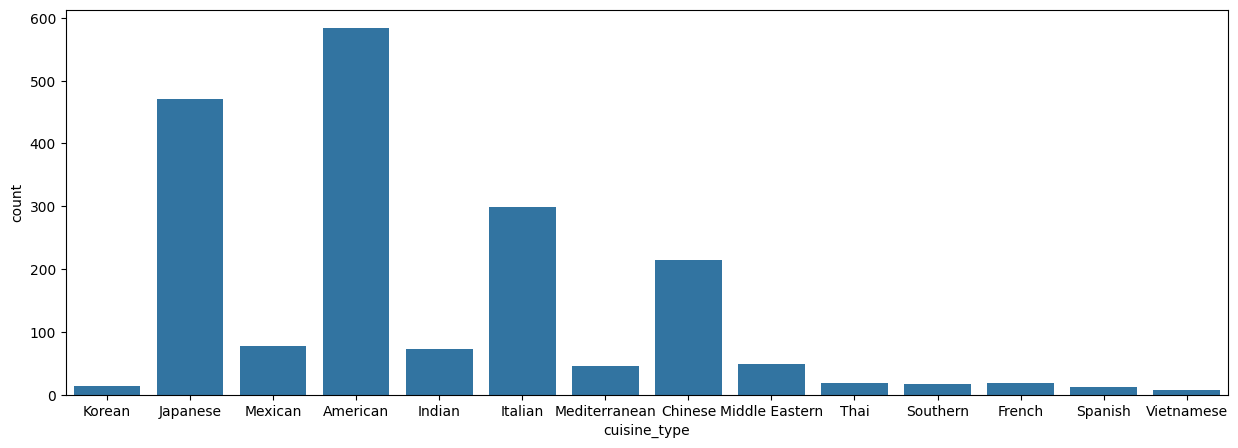

In [334]:

## Create a countplot for cuisine type.
plt.figure(figsize = (15,5))
sns.countplot(data = Read_data, x = 'cuisine_type')

##Exploring  Specific categorical variables :Day of the week , Rating, Cost of Order, Food Peparation time and Delivery Time

#Day of the week

In [335]:
# # Check the unique values
Read_data['day_of_the_week'].nunique()

2

<Axes: xlabel='day_of_the_week', ylabel='count'>

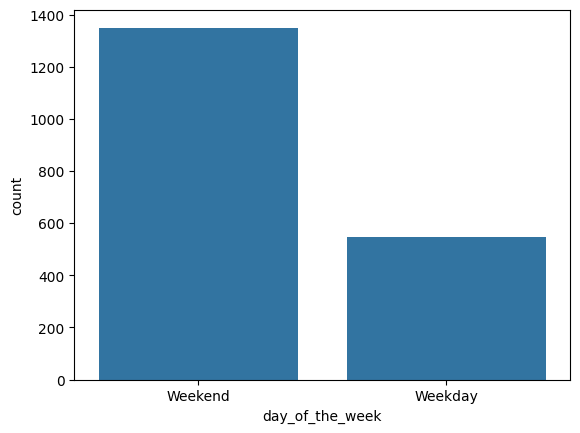

In [336]:
sns.countplot(data = Read_data, x = 'day_of_the_week')

#Rating

In [337]:
# Check the unique values
Read_data['rating'].nunique()

4

<Axes: xlabel='rating', ylabel='count'>

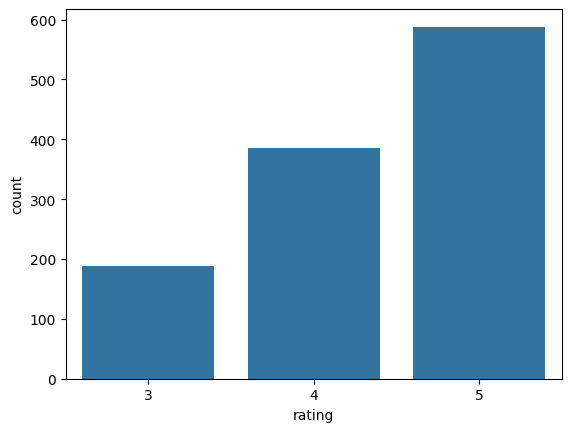

In [338]:
sns.countplot(data = df, x = 'rating')

#COST OF THE ORDER

<Axes: xlabel='cost_of_the_order', ylabel='Count'>

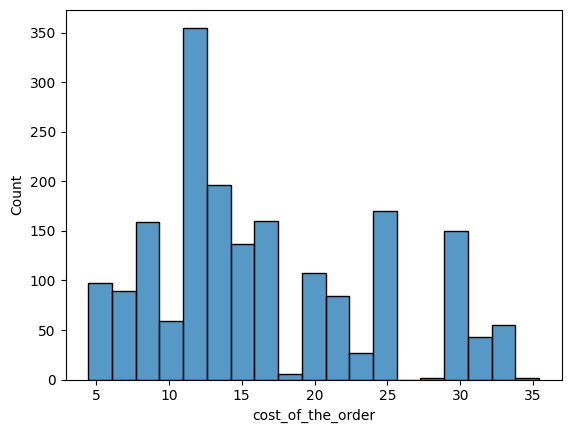

In [339]:
sns.histplot(data=Read_data, x= 'cost_of_the_order')

<Axes: xlabel='cost_of_the_order', ylabel='Count'>

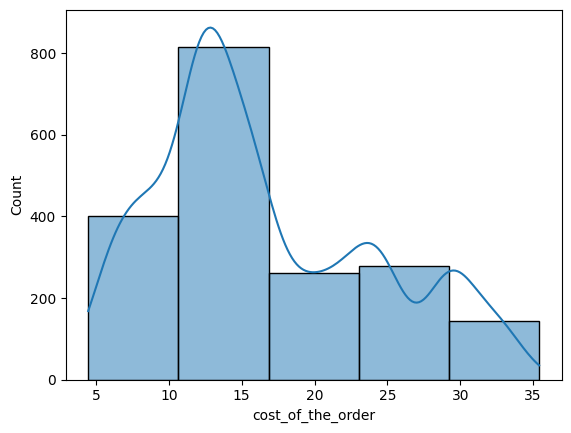

In [340]:
#Histogram
sns.histplot(data=Read_data, x='cost_of_the_order',bins=5, kde = True)


#Observations:
A histogram is a univariate plot which helps us understand the distribution of a continuous numerical variable.
It breaks the range of the continuous variables into a intervals of equal length and then counts the number of observations in each interval.
We will use the histplot() function of seaborn to create histograms.

For this project ,

1) we can see that orders that cost between 10 dollars  to 15 dollars have the highest number of order
 (count is more for orders that cost between 10 to 18 USD)
 The tallest clusters of bars, i.e., peaks, in a histogram represent the modes of the data.
A histogram skewed to the right has a large number of occurrences on the left side of the plot and a few on the right side of the plot.
Similarly, a histogram skewed to the left has a large number of occurrences on the right side of the plot and few on the left side of the plot.

 2) From the KDE plot(Meant for Categorical data), we can say that it is right skewed and has majority of the data points concentrated more on the left side


<Axes: xlabel='cost_of_the_order'>

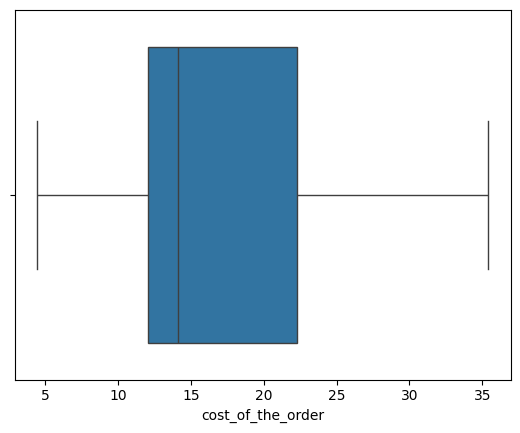

In [341]:
sns.boxplot(data=Read_data, x='cost_of_the_order')

#Observations:

Cost of  the order  Data has no outliers and is Right Skewed .

Median< Mean

When the median is closer to the left of the box and the whisker is shorter on the left end of the box, we say that the distribution is positively skewed (skewed right)

#FOOD PREPARATION TIME

<Axes: xlabel='food_preparation_time', ylabel='Count'>

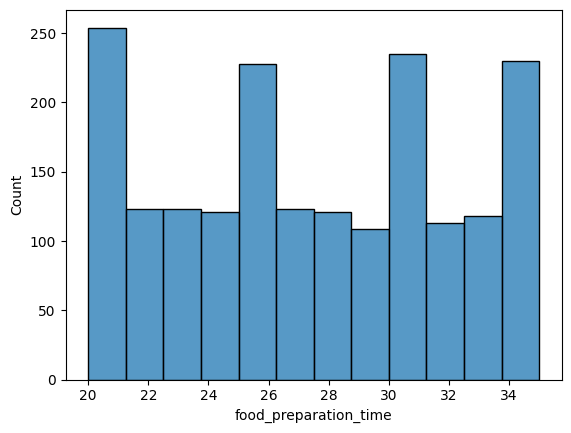

In [342]:
#histplot - food_preparation_time
sns.histplot(data=Read_data, x='food_preparation_time')

<Axes: xlabel='food_preparation_time', ylabel='Count'>

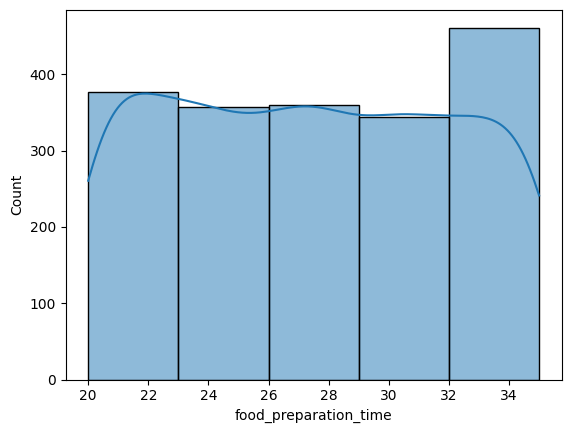

In [343]:
#Histogram
sns.histplot(data=Read_data, x='food_preparation_time',bins=5, kde = True)

#Observations:

1) we can see that longest time to prepare food took 32 to 34 minutes  The tallest clusters of bars, i.e., peaks, in a histogram represent the modes of the data.
2) From the KDE plot(Meant for Categorical data), A histogram skewness is almost flat and equal  which means the data is even . Median is same as Mode


<Axes: xlabel='food_preparation_time'>

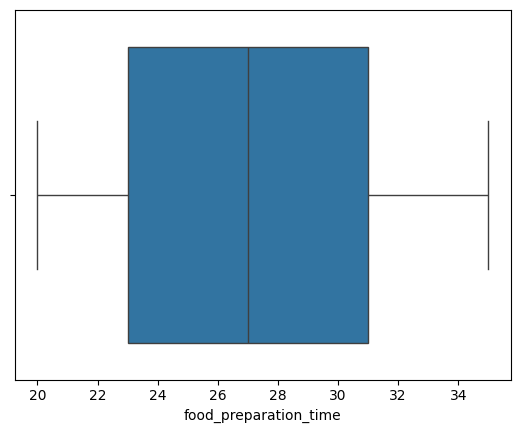

In [344]:
#Boxplot - food_preparation_time
sns.boxplot(data=Read_data, x='food_preparation_time')




#Observations:
Food preparation time Data has no outliers and has no skewness. Median = Mean

#DELIVERY TIME

<Axes: xlabel='delivery_time', ylabel='Count'>

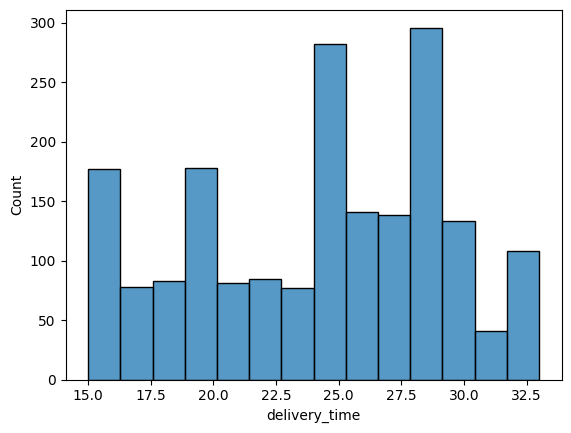

In [345]:
sns.histplot(data=Read_data, x='delivery_time')

<Axes: xlabel='delivery_time', ylabel='Count'>

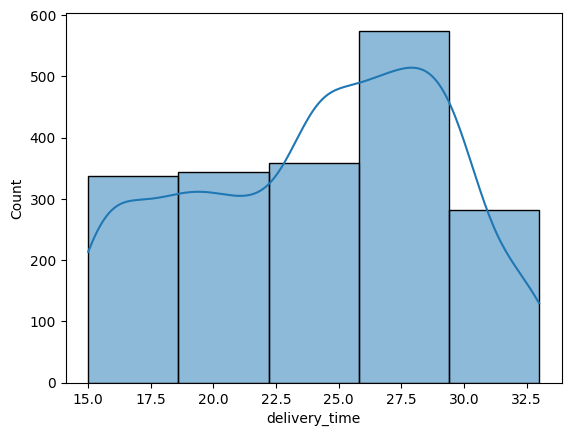

In [346]:
sns.histplot(data=Read_data, x='delivery_time',bins=5, kde = True)

<Axes: xlabel='delivery_time'>

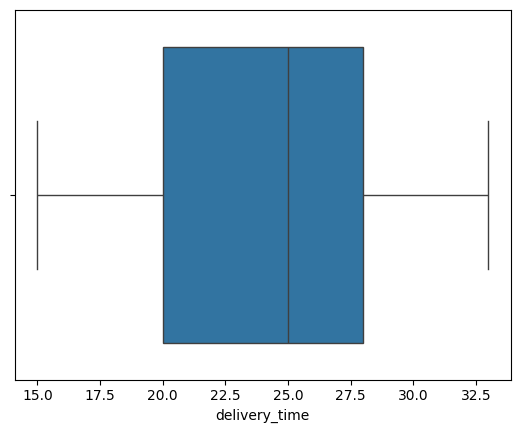

In [347]:
sns.boxplot(data=Read_data, x='delivery_time')

#Observations:

Delivery time Data has no outliers and is left Skewed .
Median > Mean
 When the median is closer to the right of the box and the whisker is shorter on the right end of the box, we say that the distribution is negatively skewed (skewed left)

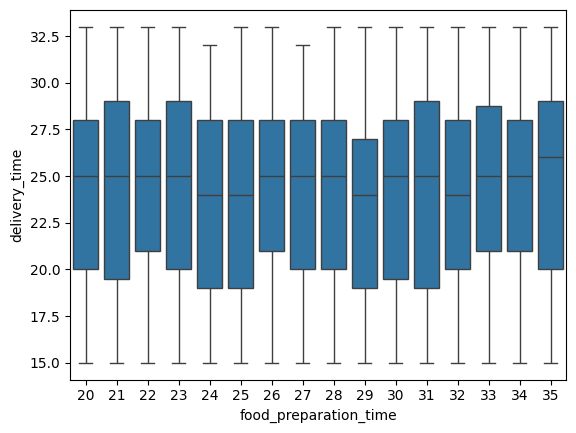

In [348]:
sns.boxplot(data=Read_data, x='food_preparation_time', y='delivery_time') ;

#Categorical Data Analysis: cuisine_type,rating and day_of_the_week

looking for uniques


In [349]:
Read_data['cuisine_type'].unique()

array(['Korean', 'Japanese', 'Mexican', 'American', 'Indian', 'Italian',
       'Mediterranean', 'Chinese', 'Middle Eastern', 'Thai', 'Southern',
       'French', 'Spanish', 'Vietnamese'], dtype=object)

<Axes: xlabel='cuisine_type', ylabel='count'>

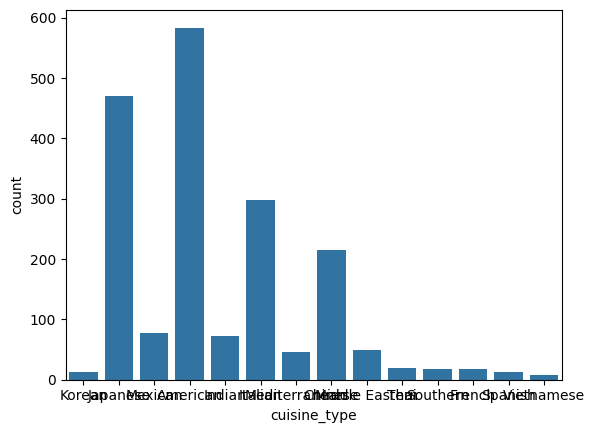

In [350]:
sns.countplot(data=Read_data,x='cuisine_type')

In [351]:
Read_data['day_of_the_week'].unique()

array(['Weekend', 'Weekday'], dtype=object)

<Axes: xlabel='day_of_the_week', ylabel='count'>

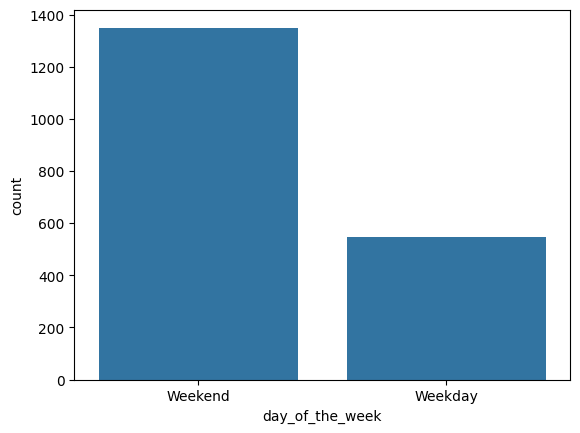

In [352]:
sns.countplot(data=Read_data,x='day_of_the_week')

In [353]:
Read_data['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

<Axes: xlabel='rating', ylabel='count'>

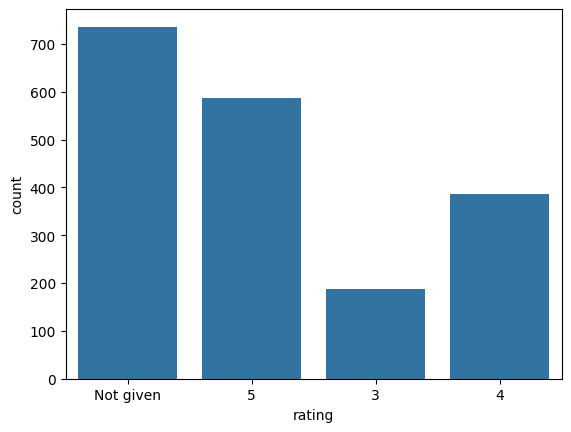

In [354]:
sns.countplot(data=Read_data,x='rating')

# Treatment evaluation  for categorical missing values

- **Evaluation Method** Replace with value based on percentages

- Need to find the perc of missing data


In [355]:
Rating_perc = count/len(Read_data['rating'].index)*100
print("Percentage of missing data:", Rating_perc)

Percentage of missing data: 38.77766069546891


Observation:

If Percentage greater than 25% , need to treat categorical missing values . Will treat with Mode imputation

# Treatment for categorical missing values

- **Treatment Method** Imputation by Mode - which means Replacing missing values with the most frequently occurring value
in the column - primarily used for categorical variables

- Need to find the mode of Rating data

In [356]:
Rating_with_valid_data = Read_data[Read_data['rating'] != 'Not given']

Mode_Rating= Rating_with_valid_data['rating'].mode()
print(Mode_Rating)



0    5
Name: rating, dtype: object


#Observations:
* * Although we have bad data , later we may or may choose to treat the data depending on the question .
* * This is just an attempt to treat bad data when needed based on the questions asked by business.

* * If we were to treat Bad data , we will do the imputation method in the following manner

#REPLACE BAD DATA WITH MODE

In [357]:
data_replace = Read_data.copy()
data_replace.loc[data_replace['rating'] == 'Not given', 'rating'] = '5'
data_replace


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,5,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,5,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,5,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31


In [358]:
test = data_replace['rating'].unique()
test

array(['5', '3', '4'], dtype=object)



*   Will use data_replace data for all further analysis involving rating data

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

The top 5 restaurants in terms of the number of orders received are  restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


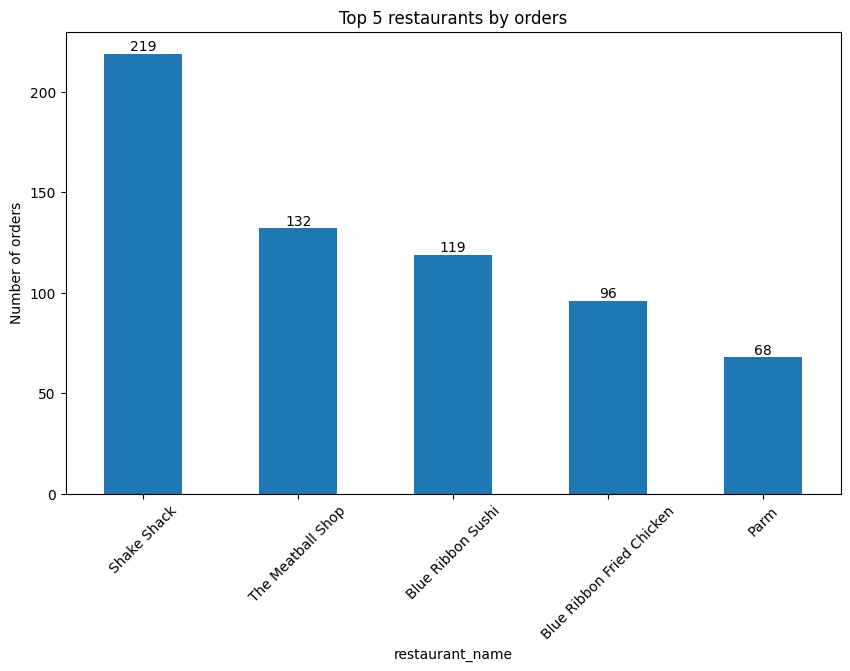

In [359]:
# Write the code here

top_5restaurant=Read_data.value_counts('restaurant_name').nlargest(5)
print("The top 5 restaurants in terms of the number of orders received are ",top_5restaurant)

#top_5restaurant.plot(kind='bar', ylabel='Number of orders', title='Top 5 restaurant by orders')
#plt.xticks(rotation=45)
#plt.show()

plt.figure(figsize=(10, 6))
ax = top_5restaurant.plot(kind='bar', ylabel='Number of orders', title='Top 5 restaurants by orders')
plt.xticks(rotation=45)

for i, count in enumerate(top_5restaurant):
    ax.annotate(f"{count}", xy=(i, count), ha='center', va='bottom')

plt.show()




#### Observations:


1.   Rank 1 : Shake Shack
2.   Rank 2 : The Meatball Shop
3.   Rank 3 : Blue Ribbon Sushi
4.   Rank 4 : Blue Ribbon fried Chicken
5.   Rank 5 : Parm

But we noticed that Blue Ribbon restaurant seems to have menu items entered as restaurant name instead of a whole food company . Data may need to be corrected




In [360]:
blue_ribbon_df = Read_data[Read_data["restaurant_name"].str.contains("Blue Ribbon", case=False)]
blue_ribbon_df

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
12,1476966,129969,Blue Ribbon Fried Chicken,American,24.30,Weekend,5,23,17
17,1477373,139885,Blue Ribbon Sushi Izakaya,Japanese,33.03,Weekend,Not given,21,22
19,1477354,67487,Blue Ribbon Sushi,Japanese,16.20,Weekend,4,35,26
...,...,...,...,...,...,...,...,...,...
1872,1477000,328731,Blue Ribbon Fried Chicken,American,29.59,Weekend,5,23,25
1878,1477194,62540,Blue Ribbon Sushi,Japanese,5.92,Weekday,Not given,27,31
1879,1477132,110792,Blue Ribbon Sushi,Japanese,12.13,Weekend,5,28,15
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24


In [361]:
top_5restaurant_blue_ribbon_df=blue_ribbon_df.value_counts('restaurant_name').nlargest(5)


# Print the results
print(top_5restaurant_blue_ribbon_df)

# Print total orders recived by Blue Ribbon Restaurant



print("Total orders received by Blue Ribbon Restaurant ",top_5restaurant_blue_ribbon_df.sum())


restaurant_name
Blue Ribbon Sushi                119
Blue Ribbon Fried Chicken         96
Blue Ribbon Sushi Bar & Grill     44
Blue Ribbon Sushi Izakaya         29
Blue Ribbon Brooklyn               4
Name: count, dtype: int64
Total orders received by Blue Ribbon Restaurant  292


#Observations

If we were to total up the orders recived by Blue Ribbon then Rank #1 would go to Blue Ribbon restaurant .





In [362]:
# Other Data entry issues include same restaurant names containing different location name

RedFarm_df = Read_data[Read_data["restaurant_name"].str.contains("RedFarm", case=False)]
RedFarm_df

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
18,1477138,47280,RedFarm Hudson,Chinese,14.12,Weekend,4,25,24
42,1477267,133637,RedFarm Broadway,Chinese,24.25,Weekend,5,22,15
53,1478107,73895,RedFarm Broadway,Chinese,29.10,Weekend,Not given,22,23
57,1477889,177250,RedFarm Hudson,Chinese,12.23,Weekday,5,25,33
66,1476841,398426,RedFarm Broadway,Chinese,12.46,Weekend,4,24,20
...,...,...,...,...,...,...,...,...,...
1774,1476993,301825,RedFarm Broadway,Chinese,12.23,Weekend,Not given,32,19
1828,1478166,177250,RedFarm Hudson,Chinese,12.13,Weekend,Not given,31,27
1855,1476723,136807,RedFarm Hudson,Chinese,19.35,Weekday,5,35,28
1868,1477778,100889,RedFarm Broadway,Chinese,31.43,Weekend,4,30,23


In [363]:
#find number of locations using head function

print("Names of REDFARM restaurants location:",RedFarm_df['restaurant_name'].unique())
df_test = RedFarm_df['restaurant_name'].unique()
# Using numpy.unique
unique, counts = np.unique(df_test, return_counts=True)
#print(dict(zip(unique, counts)))

# Using collections.Counter
import collections
counter = collections.Counter(df_test)
print(counter)



#print("test",df_test.count())



Names of REDFARM restaurants location: ['RedFarm Hudson' 'RedFarm Broadway']
Counter({'RedFarm Hudson': 1, 'RedFarm Broadway': 1})


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [364]:
# Write the code here

Weekend_Data = Read_data[Read_data['day_of_the_week'] == 'Weekend']
# viewing Weekend_Data
#Most_pop_cusine_weekend = Weekend_Data.cuisine_type

Weekend_Data


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,Not given,28,21
11,1478437,221206,Empanada Mama (closed),Mexican,8.10,Weekend,5,23,22
...,...,...,...,...,...,...,...,...,...
1891,1476981,138586,Shake Shack,American,5.82,Weekend,Not given,22,28
1892,1477473,97838,Han Dynasty,Chinese,29.15,Weekend,Not given,29,21
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19


In [365]:
#Most popular cuisine on weekend
Most_pop_cuisine_weekend = Weekend_Data.value_counts('cuisine_type').nlargest(1)
#Most_pop_cuisine_weekend1 =Most_pop_cusine_weekend.to_csv('Most_pop_cusine_weekend.csv',header=)
print ("The most popular cuisine on weekend is : ",Most_pop_cuisine_weekend )
#print(type(Most_pop_cuisine_weekend))
#print(Most_pop_cuisine_weekend.to_string(index=False))

#Most_pop_cuisine_weekend.drop(labels=Most_pop_cuisine_weekend.index[1], inplace=False)


The most popular cuisine on weekend is :  cuisine_type
American    415
Name: count, dtype: int64


#Additional analysis

In [366]:
Weekend_Data = Read_data[Read_data['day_of_the_week'] == 'Weekend']
# viewing Weekend_Data
#Most_pop_cusine_weekend = Weekend_Data.cuisine_type

Weekend_Data
#Most popular cuisine on weekend
Most_pop_cuisine_weekend = Weekend_Data.value_counts('cuisine_type').nlargest(1)
#Most_pop_cuisine_weekend1 =Most_pop_cusine_weekend.to_csv('Most_pop_cusine_weekend.csv',header=)
print ("The most popular cuisine on weekend is : ",Most_pop_cuisine_weekend )
#print(type(Most_pop_cuisine_weekend))

Weekday_Data = Read_data[Read_data['day_of_the_week'] == 'Weekday']
# viewing Weekend_Data
#Most_pop_cusine_weekend = Weekend_Data.cuisine_type

Weekday_Data
#Most popular cuisine on weekend
Most_pop_cuisine_weekday = Weekday_Data.value_counts('cuisine_type').nlargest(1)
#Most_pop_cuisine_weekend1 =Most_pop_cusine_weekend.to_csv('Most_pop_cusine_weekend.csv',header=)
print ("The most popular cuisine on weekday is : ",Most_pop_cuisine_weekday )
#print(type(Most_pop_cuisine_weekend))



The most popular cuisine on weekend is :  cuisine_type
American    415
Name: count, dtype: int64
The most popular cuisine on weekday is :  cuisine_type
American    169
Name: count, dtype: int64


#### Observations:
**American cuisine has the most orders on the weekend tallying to 415 orders**.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [367]:
# Write the code here

Perc = (Read_data[Read_data['cost_of_the_order']>20].shape[0]/Read_data.shape[0])*100
print(Read_data[Read_data['cost_of_the_order']>20].shape[0])
print(Read_data.shape[0])


print("Percentage of orders above 20 dollars:", round(Perc, 2), '%')

555
1898
Percentage of orders above 20 dollars: 29.24 %


#### Observations:
**About 29 percent of the orders are priced at 20 dollars**

### **Question 10**: What is the mean order delivery time? [1 mark]

In [368]:
# Write the code here
Mean_del_time= Read_data['delivery_time'].mean()
print(Mean_del_time)

print('The mean delivery time for this dataset is', round(Mean_del_time, 2), 'minutes')

24.161749209694417
The mean delivery time for this dataset is 24.16 minutes


#### Observations:

**Mean order Delivery time is 24 minutes**


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [369]:
# Write the code here
#count of customer id - to find the frequency
customer_data = Read_data['customer_id']

# Get the counts of  each customer_id
Read_data['customer_id'].value_counts().head(3)

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64
<class 'pandas.core.series.Series'>


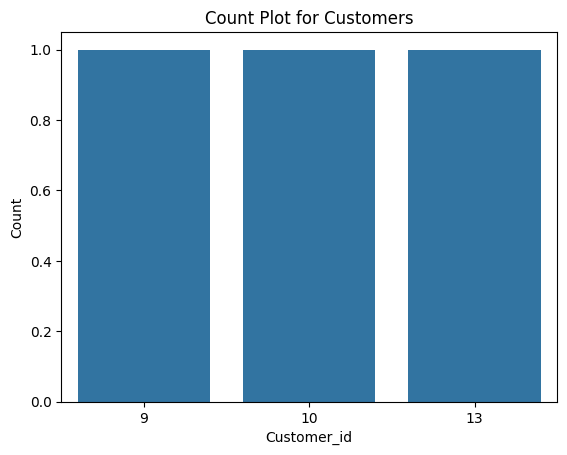

In [370]:


TOP_3_customer_id = Read_data.value_counts(customer_data).nlargest(3)
print(TOP_3_customer_id)
print(type(TOP_3_customer_id))

# adding countplot for visualization

sns.countplot(x=TOP_3_customer_id)
plt.xlabel('Customer_id')
plt.ylabel('Count')
plt.title('Count Plot for Customers')
plt.show()

for i, count in enumerate(TOP_3_customer_id):
    ax.annotate(f"{count}", xy=(i, count), ha='center', va='bottom')

plt.show()

#### Observations:
The top 3 customers are the following -

*   52832  with   13 orders


*   47440  with   10 orders

* 83287    with  9   orders





### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


#### Cuisine vs Cost of the order

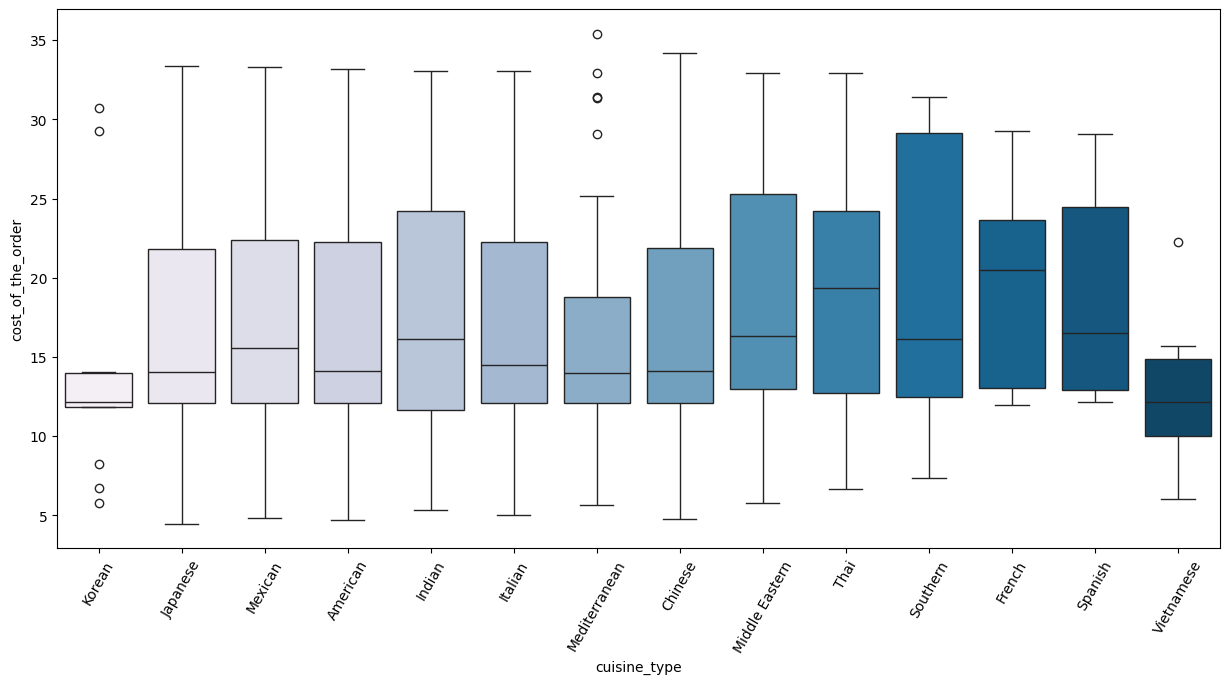

In [371]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = Read_data, palette = 'PuBu', hue = "cuisine_type")
plt.xticks(rotation = 60)
plt.show()

#Observations
Mediterranean cuisine seems to have some outliers that show that they are more expensive in some cases.

Korean Cusine seems to have outliers  that shows that they are least expensive in some cases

Vietnamese cuisine seems to be the least priced .

#### Cuisine vs Food Preparation time

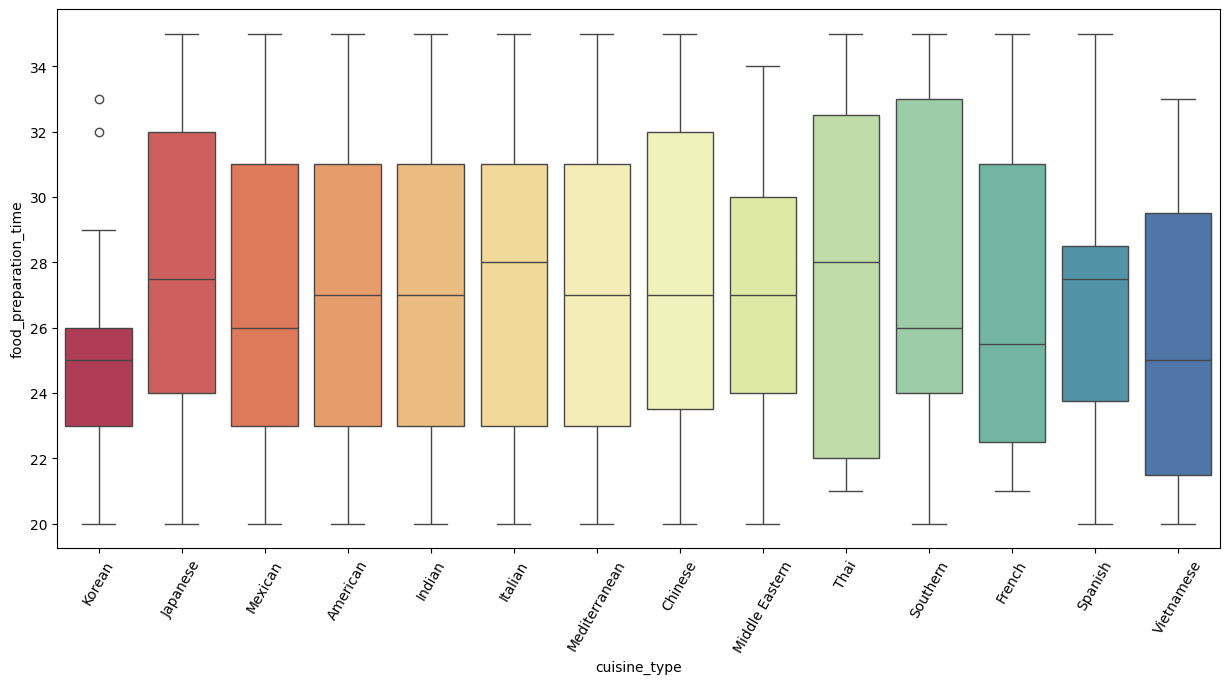

In [372]:
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = 'food_preparation_time', data = Read_data,palette = 'Spectral', hue = "cuisine_type")
plt.xticks(rotation = 60)
plt.show()

#Observations

Korean cusine takes the shortest time to prepare under 30 mins

Majority (11) of the cuisine take more than 34 mins to prepare

Middle Eastern cuisine dishes mostly seems to have the least preparation time







#### Day of the Week vs Delivery time

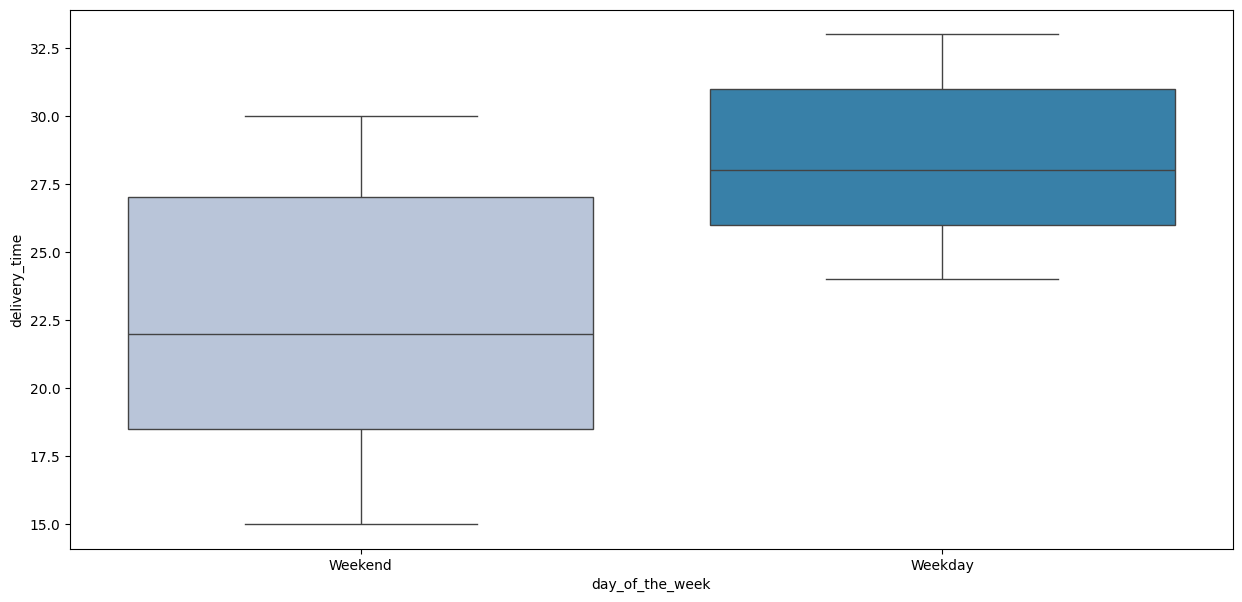

In [373]:
# Relationship between day of the week and delivery time
plt.figure(figsize=(15,7))
sns.boxplot(x = "day_of_the_week", y = 'delivery_time', data = Read_data, palette = 'PuBu', hue = "day_of_the_week")
plt.show()

#Observation
Delivery times are shorter on the weekend than weekday.


#Total Revenue for  Restaurant ordered in descending order for first 15 top revenue earners

In [374]:
Read_data.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(15)

restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Rubirosa                          660.45
Sushi of Gari 46                  640.87
Nobu Next Door                    623.67
Five Guys Burgers and Fries       506.47
Momoya                            492.13
Name: cost_of_the_order, dtype: float64

#Rating Vs delivery time

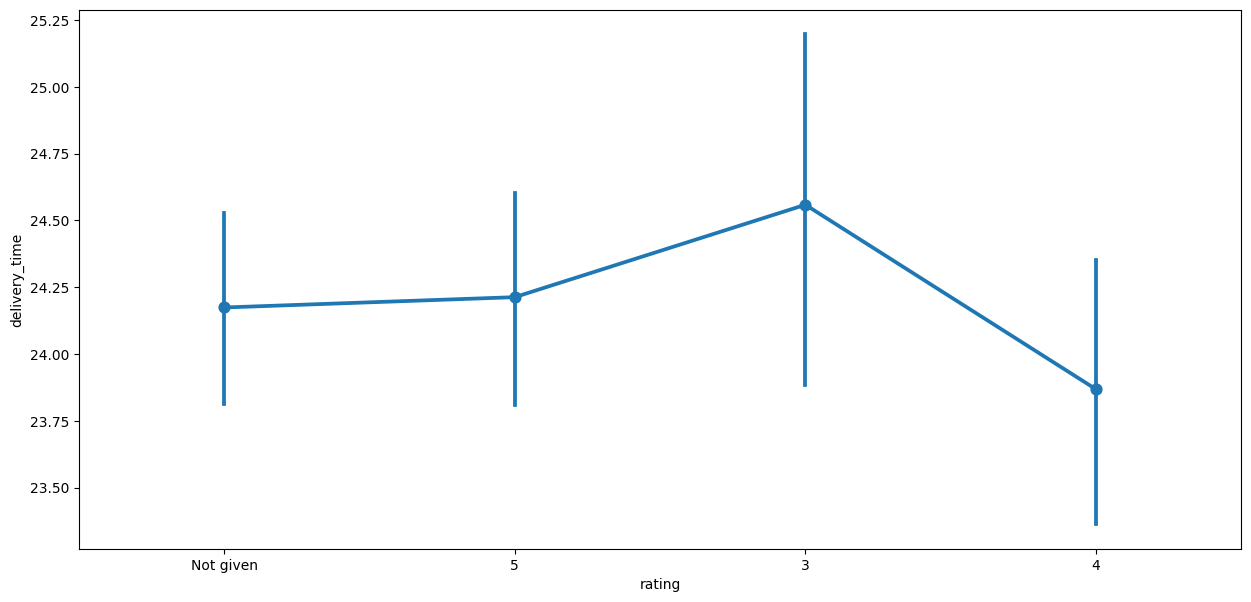

In [375]:
# Relationship between rating and delivery time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = Read_data)
plt.show()

# Observation
rating and delivery time :
The mean delivery time for this dataset is 24.16 minutes

Point plot is usually used  to check  correlation between categorical and numerical values .

The mean Delivery time for each rating is depicted here.

Rating 5 - About 24.25 minutes is the mean delivery time

Rating 4 - About 24 minutes is the mean delivery time
Rating 3 - About 24.50 minutes is the mean delivery time

**Which means that faster delivery time can improve Ratings **


#Rating vs Cost of the order

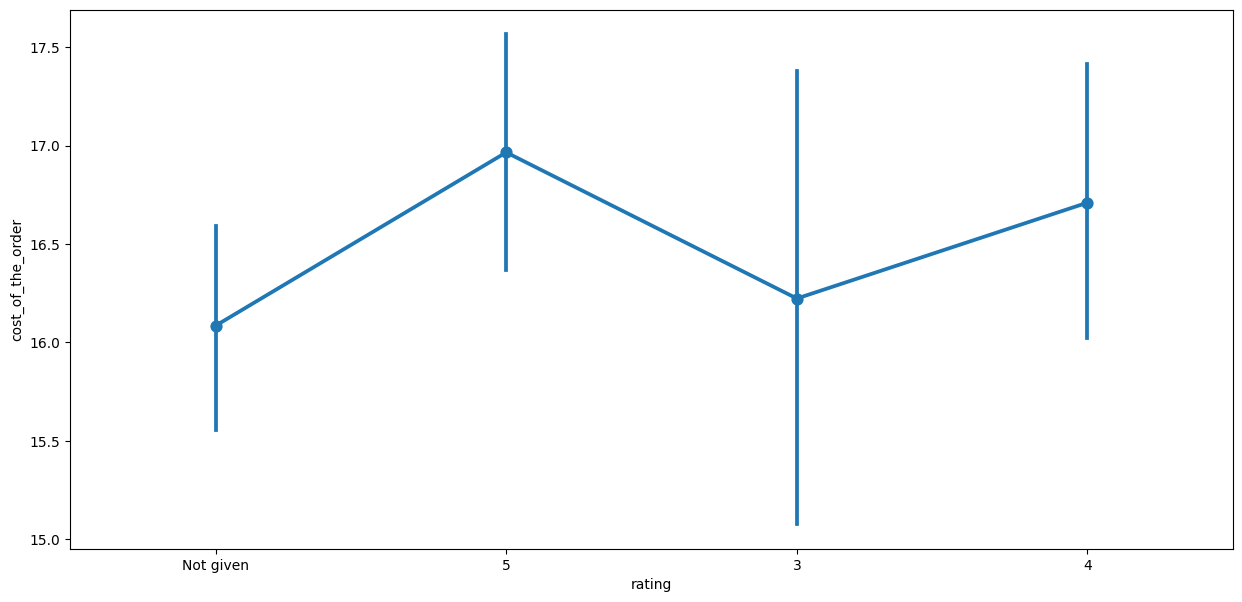

In [376]:
# Relationship between rating and cost of the order
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'cost_of_the_order', data = Read_data)
plt.show()




# Observation
rating and Cost of the order  :


Point plot is usually used  to check  correlation between categorical and numerical values .

The mean COst of the order for each rating is depicted here.


Rating 5 - About 17 dollars is the mean cost of order for this rating

Rating 4 - About 16.50 dollars is the mean cost of the order for this rating
Rating 3 - About 16 dollars  is the mean cost of order for this rating

**Which means although average cost of order is about 16.50$ and Ratings are not really affected by price or cost of the order  **

#### **Correlation by Heatmap**

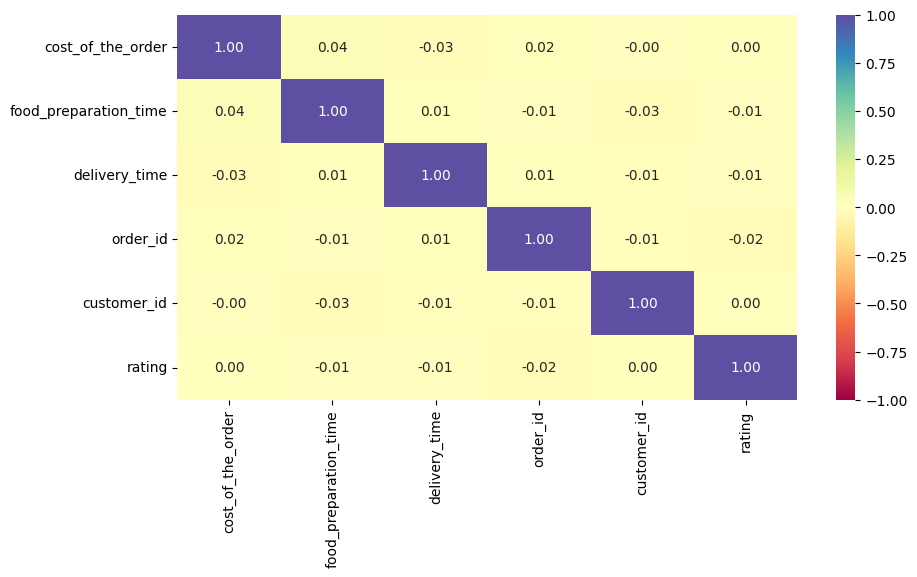

In [377]:
# Write the code here

#heatmap
#Heatmap does not show categorical variables , hence choosing quantitative data
plt.figure(figsize=(10,5))
sns.heatmap(data=data_replace[['cost_of_the_order','food_preparation_time','delivery_time','order_id','customer_id','rating']].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral");
plt.show()
#sns.heatmap(data.corr(), annot=True, cmap='YlGnBu') # vmin=-1, vmax= 1, );



#removing data that is not a value add : order id , Customer Id

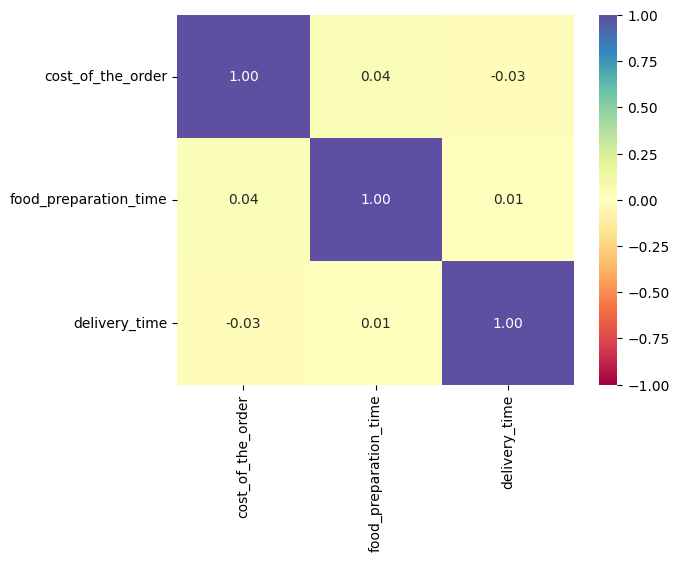

In [378]:
sns.heatmap(data=Read_data[['cost_of_the_order','food_preparation_time','delivery_time']].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral");
plt.show()

* *As expected, Cost of the order  shows high correlation with food preparation time.If order is expensive, then the time taken to prepare the dish carefully will be High. This is aligned with our intuitive understanding*
* *Delivery time is negatively correlated with Cost of the order.*

* *It is important to note that correlation does not imply causation*

* *There seems to be a strong relationship between cost of the order  and Food preparation time*




#### **Bivariate Scatter Plots**

A **scatterplot** displays the relationship between 2 numeric variables. For each data point, the value of its first variable is represented on the X axis, the second on the Y axis

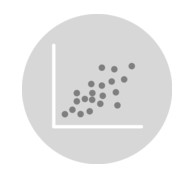

In [ ]:
data1=Read_data[['cost_of_the_order','food_preparation_time','delivery_time','order_id','customer_id']]

sns.pairplot(data=data1, diag_kind="kde")
plt.show()

 - *We get the same insights as before from the correlation plot*
- *There seems to be a strong relationship between cost of the order  and Food preparation time*

In [ ]:
#Countplot

sns.countplot(data=Read_data, x='rating', hue='day_of_the_week');

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Write the code here
#1) filter restaurant data that do not have a ratingas 'NOt Given'
Rating_with_valid_data = Read_data[Read_data['rating'] != 'Not given']

print("The data type of rating is :",Rating_with_valid_data.dtypes['rating'])
print(Rating_with_valid_data)




In [ ]:
#2 Converting rating column converted to Integer datatype
Rating_with_valid_data['rating'] = Rating_with_valid_data['rating'].astype(int)
print("The data type of rating is :",Rating_with_valid_data.dtypes['rating'])

In [ ]:
#FIlter for data with count of 50 or more rating for a given restaurant and having rating and avg rating of 4


filtered_data=Rating_with_valid_data.filter(items=['restaurant_name','rating'])
#filtered_data
df= filtered_data
df



In [ ]:
#Grouping Rating data by restaurant 1) having counts greater than 50 and 2)having an avg rating of 4
#1) Count > = 50

Rating_count = filtered_data.groupby(by = ['restaurant_name'])['rating'].count()


filtered_Rating_count = Rating_count[Rating_count >= 50]
print(filtered_Rating_count)



In [ ]:
# Creating a dataframe that contains the restaurant names with their rating counts in Descending order
df_rating_count = filtered_data.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head()



In [ ]:
# Get the restaurant names with rating count more than 50
rating_counts = df.groupby('restaurant_name')['rating'].count()
top_rated_restaurants = rating_counts[rating_counts > 50].index

# Calculate mean ratings for top-rated restaurants
mean_ratings = df[df['restaurant_name'].isin(top_rated_restaurants)]
mean_ratings = mean_ratings.groupby('restaurant_name')['rating'].mean().reset_index()

print(mean_ratings)

#### Observations:

* Only 4 restaurants were found to be fulfilling the criteria to get the promotional offer

* The 4 restaurants are

1.   Blue Ribbon Fried Chicken

2.   Blue Ribbon Sushi
3.Shake Shack
4. The Meatball Shop



### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Write the code here
df1= Rating_with_valid_data

def calculate_net_revenue(order_costs):
    total_revenue = 0

    for cost in order_costs:
        if cost > 20:
            total_revenue += 0.25 * cost
        elif cost > 5:
            total_revenue += 0.15 * cost

    return total_revenue


order_costs = df1['cost_of_the_order']

net_revenue = calculate_net_revenue(order_costs)
print(f"Net revenue generated by the company is about: ${net_revenue:.2f}")






#### Observations:
The net revenue generated by the company is $3865.57 across all orders

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Write the code here

preparation_times = df1['food_preparation_time']
delivery_times = df1['delivery_time']

def calculate_percentage_above_threshold(times, threshold_minutes):
    times = preparation_times + delivery_times
    above_threshold = sum(time > threshold_minutes for time in times)
    total_orders = len(times)
    percentage = (above_threshold / total_orders) * 100
    return percentage


# Calculate percentage of orders taking more than 60 minutes
threshold_minutes = 60
percentage_above_60 = calculate_percentage_above_threshold(delivery_times, threshold_minutes)

print(f"Percentage of orders taking more than {threshold_minutes} minutes: {percentage_above_60:.2f}%")


#### Observations:
We found that 10.24% of orders are taking more than 60 minutes

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Write the code here


# Separate weekdays and weekends
weekdays_df = df1[df1['day_of_the_week'] == 'Weekend']  # Data for Weekend
weekends_df = df1[df1['day_of_the_week'] == 'Weekday']  # Data for weekday

# Calculate mean delivery time for weekdays and weekends
mean_delivery_time_weekdays = weekdays_df['delivery_time'].mean()
mean_delivery_time_weekends = weekends_df['delivery_time'].mean()

print(f"Mean delivery time (weekdays): {mean_delivery_time_weekdays:.2f} minutes")
print(f"Mean delivery time (weekends): {mean_delivery_time_weekends:.2f} minutes")


#### Observations:

* The Mean Delivery time on weekdays is 22.44 minutes
* the Mean Delivery time on weekends is 28.31 minutes


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

In [ ]:
#Profiling the data



In [ ]:
ProfileReport(Read_data)
profile = ProfileReport(Read_data, title='Sample Data Profile Report')
profile.to_file('sample_data_report.html')

### Conclusions:
Observations:
#Q1)The Dataset has 1898 number of rows with 9 columns

#Q2) There is only 1 Float Dataype column
  4 object datatype column
  4 numerical datatypes
All the columns have 1898 observations.

*There are 3 Categorical variables -
     

1.   Cuisine Name
2.   rating
3. Day of week

* 1 Object Text data : Restaurant  Name

* 4 Numeric Data -
1.   Order id
2.   Customer id
3.   Food Preparation Time
4.   Delivery Time  

#Q3)

Although isnull function shows that all records are Not null. Rating is a Data attribute which is  actually missing data as customers chose not give give a response and therefore has missing values.

Imputation by Mode - which means Replacing missing values with the most frequently occurring value
in the column - primarily used for categorical variables

But this needs to be consulted with Business to understand if they approve this approach.

#Q4)

Observations:The minimum, average, and maximum time it takes for food to be prepared once an order is placed are the following
#Minimum : 20 minutes
#Average : 27.37 minutes
#Maximum: 35 minutes

#Q5) The number of orders that were not rated by customers: 736

 #Percentage of missing data in rating data : 38.77766069546891

 Observations:
736 orders did not get any Rating

-'Not given' can be treated as a missing values. 38% of data is missing

-We need to treat missing values.


#Q6)EDA: Observations:
A histogram is a univariate plot which helps us understand the distribution of a continuous numerical variable. It breaks the range of the continuous variables into a intervals of equal length and then counts the number of observations in each interval. We will use the histplot() function of seaborn to create histograms.

For this project ,

a) we can see that orders that cost between 10 dollars to 15 dollars have the highest number of order (count is more for orders that cost between 10 to 18 USD) The tallest clusters of bars, i.e., peaks, in a histogram represent the modes of the data. A histogram skewed to the right has a large number of occurrences on the left side of the plot and a few on the right side of the plot. Similarly, a histogram skewed to the left has a large number of occurrences on the right side of the plot and few on the left side of the plot.

b) From the KDE plot(Meant for Categorical data), we can say that it is right skewed and has majority of the data points concentrated more on the left side


Observations for Categorical Data

#Cost of  the order
----------------------

 Data has no outliers and is Right Skewed .

#Median< Mean

When the median is closer to the left of the box and the whisker is shorter on the left end of the box, we say that the distribution is positively skewed (skewed right)

#Food Preparation time
----------------------
 Food Preparation time data has the following observations: we can see that longest time to prepare food took 32 to 34 minutes The tallest clusters of bars, i.e., peaks, in a histogram represent the modes of the data. 2) From the KDE plot(Meant for Categorical data), A histogram skewness is almost flat and equal which means the data is even .
 #Median is same as Mode

#Delivery time Data
----------------------
Delivery time Data has no outliers and is left Skewed .

#Median > Mean

When the median is closer to the right of the box and the whisker is shorter on the right end of the box, we say that the distribution is negatively skewed (skewed left)

# Treatment evaluation  for categorical missing values

- **Evaluation Method** Replace with value based on percentages

- Need to find the perc of missing data
 Observation:

If Percentage greater than 25% , need to treat categorical missing values . Will treat with Mode imputation

 # Treatment for categorical missing values

- **Treatment Method** Imputation by Mode - which means Replacing missing values with the most frequently occurring value
in the column - primarily used for categorical variables

- Need to find the mode of Rating data

#Observations:
* * Although we have bad data , later we may or may choose to treat the data depending on the question .
* * This is just an attempt to treat bad data when needed based on the questions asked by business.

* * If we were to treat Bad data , we will do the imputation method in the following manner

#Q7) 1.   Rank 1 : Shake Shack
2.   Rank 2 : The Meatball Shop
3.   Rank 3 :Blue Ribbon Sushi
4.   Rank 4 : Blue Ribbon fried Chicken
5.   Rank 5 : Parm

Further Data Analysis revealed that Blue Ribbon restaurants had multiple cuisines and order could tally to more than 200 .But we noticed that Blue Ribbon restaurant seems to have menu items entered as restaurant name instead of a whole food company and one name consisted of location. Data may need to be corrected

Observations
If we were to total up the orders received by Blue Ribbon then Rank #1 would go to Blue Ribbon restaurant .

restaurant_name
Blue Ribbon Sushi                119
Blue Ribbon Fried Chicken         96
Blue Ribbon Sushi Bar & Grill     44
Blue Ribbon Sushi Izakaya         29
Blue Ribbon Brooklyn               4
Name: count, dtype: int64
Total orders received by Blue Ribbon Restaurant  292

 Similarly a restaurant named REDFARM also had two locations in it's name

restaurant_name
RedFarm Broadway    59
RedFarm Hudson      55
Name: count, dtype: int64
Total orders received by REDFARM group of  Restaurants  114


#Q8)American cuisine has the most orders on the weekend tallying to 415 orders.

#Q9)About 29 percent of the orders are priced at 20 dollars

#Q10) Mean order Delivery time is 24 minutes

#Q11)#### Observations:
The top 3 customers are the following -

*   52832  with   13 orders


*   47440  with   10 orders

* 83287    with  9   orders


Company may need to introduce a loyalty program for these repeat customers to encourage them to place more future orders

#Q12)# Observation
rating and delivery time :
The mean delivery time for this dataset is 24.16 minutes

Point plot is usually used  to check  correlation between categorical and numerical values .

The mean Delivery time for each rating is depicted here.

Rating 5 - About 24.25 minutes is the mean delivery time

Rating 4 - About 24 minutes is the mean delivery time
Rating 3 - About 24.50 minutes is the mean delivery time

**Which means that faster delivery time can improve Ratings **

#Observations:
Using heatmap:
As expected, Cost of the order shows high correlation with food preparation time.If order is expensive, then the time taken to prepare the dish carefully will be High. This is aligned with our intuitive understanding

Delivery time is negatively correlated with Cost of the order.

It is important to note that correlation does not imply causation

Using Pairplot:

- *We get the same insights as before from the correlation plot*
- *There seems to be a strong relationship between cost of the order  and Food preparation time*

There seems to be a strong relationship between cost of the order and Food preparation time

#Q13)First we treated data to  filter restaurant data that do not have a rating as 'Not Given'


Observations:
Only 4 restaurants were found to be fulfilling the criteria to get the promotional offer

The 4 restaurants are

Blue Ribbon Fried Chicken

Blue Ribbon Sushi

Shake Shack

The Meatball Shop


#Q14)Net revenue generated by the company: $3865.57

#Q15) We found that 10.24% of orders are taking more than 60 minutes

#Q16) The Mean Delivery time on weekdays is 22.44 minutes and the Mean Delivery time on weekends is 28.31 minutes



### Recommendations:

*  Data Collection can be improved and other details such as location and type of cusine can also be collected to better predict customer sentiments : Blue Ribbon and RedFarm restaurants
*  Loyalty Programe can be started for repeat customers encouraging them to place more frequent orders
*  4 restaurants were found to be fulfilling the criteria to get the promotional offer of  advertisement of the restaurants
*  But also poor performance of some restaurants may need a boost specifically restaurants having American cuisine.  There is potential there to boost patronage from cusomers as most favored cuisine on weekends was "American" (counts were 169 in weekdays and 415 on weekends). This can be running promotional offers on weekends  

* Rating and delivery time correlation showed  that faster delivery time can improve Ratings. THe Company can focus on improving delivery time to increase Rating for a given restaurant.


---